In [1]:
import numpy as np
import torch
from OptimalTransportBalancing import OptimalTransportBalancing as OTB
import matplotlib.pyplot as plt
%matplotlib inline

## Build sythetic data set

In [2]:
n = 500
m = 420
xi = torch.normal(mean = -1, std = 3, size = (n,1))
xi_ring = torch.zeros(size = (m,1))
for i in range(m):
    if torch.rand(1).item()>0.3:
        xi_ring[i,0] = torch.normal(mean = -4, std = 2, size = (1,)).item()
    else:
        xi_ring[i,0] = torch.normal(mean = 3, std = 0.2, size = (1,)).item()

## Define OptimalTransportBalancing class

In [3]:
OTB = OTB()

## Get optimal weights for the source measure

In [4]:
w_ring = OTB.get_weights(xi,xi_ring)

## Viz

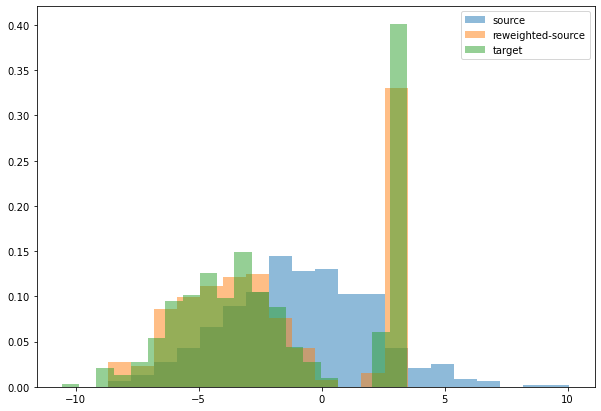

In [5]:
plt.figure(figsize = (10,7))
plt.hist(xi[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 20, label ="source", density = True)
plt.hist(xi[:,0].to("cpu").detach().numpy(),weights = w_ring.detach().numpy() , alpha = 0.5, bins = 20, label ="reweighted-source", density = True)
plt.hist(xi_ring[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 20, label ="target", density = True)
plt.legend()